# Polynomial ODE to transcriptional network examples

In [1]:
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams['mathtext.fontset'] = 'cm'

## Sine-cosine oscillator

*Note:* The typical sine-cosine oscillator is $x' = y$ and $y' = -x$, which takes on negative values. Since transcriptional factor concentrations are nonnegative, we "shift" the oscillator up using $x' = y-2$ and $y' = -x+2$ so that both variables stay positive.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tn_inits={x_t: 2.0, x_b: 1.0, y_t: 1.0, y_b: 1.0}
tn_syms={x: (x_t, x_b), y: (y_t, y_b)}


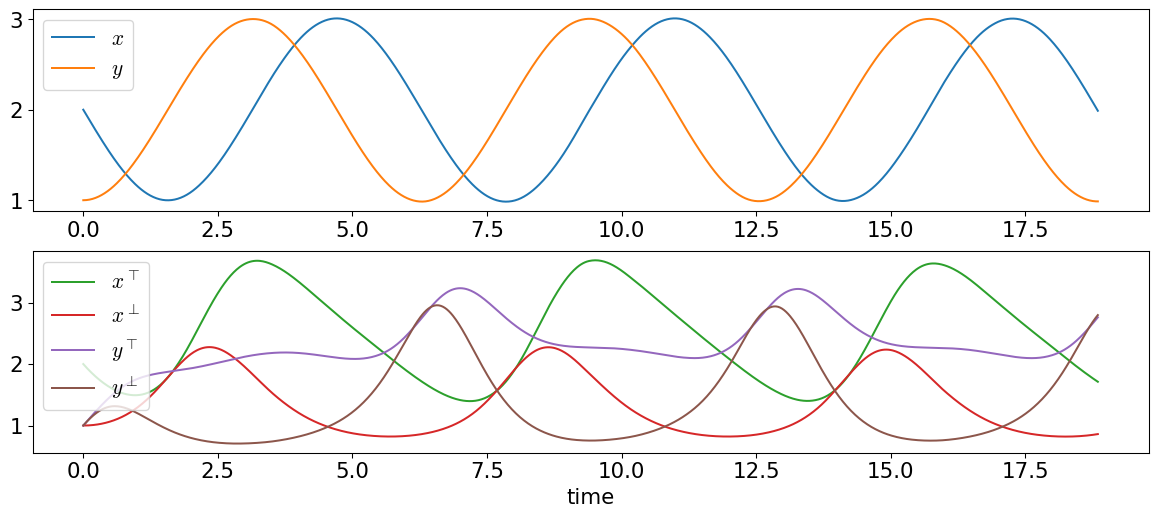

In [2]:
from math import pi
import numpy as np
import gpac as gp
import sympy as sp
from ode2tn import plot_tn, ode2tn

x,y = sp.symbols('x y')
odes = {
    x: y-2,
    y: -x+2,
}
inits = {
    x: 2,
    y: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_syms = ode2tn(odes, inits, gamma=gamma, beta=beta)
gp.display_odes(tn_odes)
print(f'{tn_inits=}')
print(f'{tn_syms=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval, figure_size=figsize, show_factors=True)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tn_inits={x_t: 2.0, x_b: 1.0, y_t: 1.0, y_b: 1.0}
tn_syms={x: (x_t, x_b), y: (y_t, y_b)}
times = [0.         1.57079633 3.14159265 4.71238898 6.28318531]
x_y = [2.         1.78280757 3.67207594 2.80592514 1.71859172]
x_b = [1.         1.78425369 1.83663725 0.93260227 0.859926  ]
y_t = [1.         1.87324904 2.14156469 2.10338162 2.74383426]
y_b = [1.         0.93637933 0.71348949 1.05261915 2.78279691]


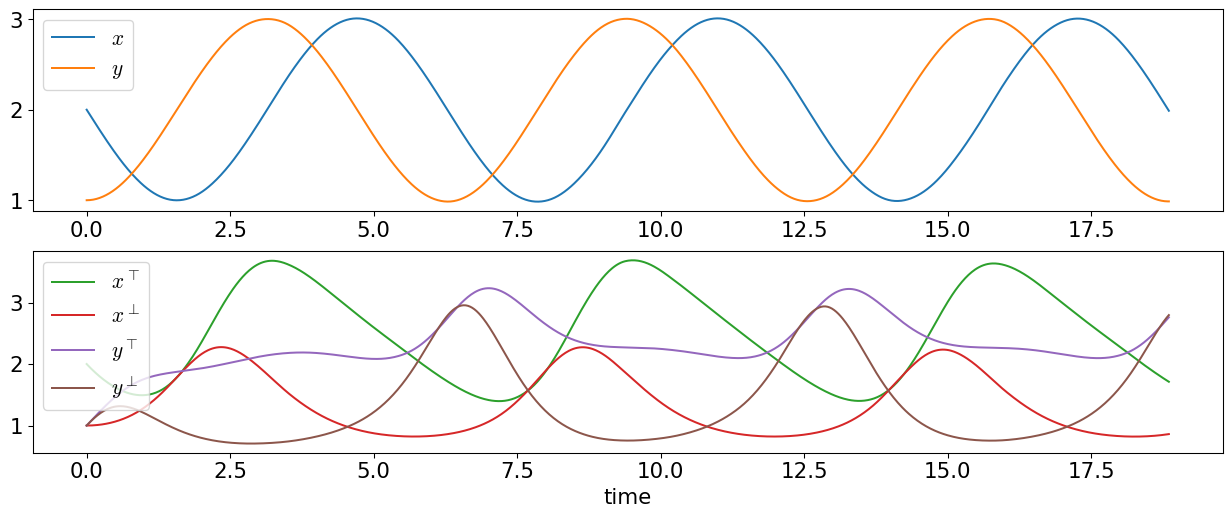

In [3]:
# simplified cell for example in README
from math import pi
import numpy as np
import sympy as sp
import gpac as gp
from ode2tn import plot_tn, ode2tn

x,y = sp.symbols('x y')
odes = { # odes dict maps each symbol to an expression for its time derivative
    x: y-2,
    y: -x+2,
}
inits = { # inits maps each symbol to its initial value
    x: 2,
    y: 1,
}
gamma = 2 # uniform decay constant; should be set sufficiently large that ???
beta = 1 # constant introduced to keep values from going to infinity or 0
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_syms = ode2tn(odes, inits, gamma=gamma, beta=beta)
gp.display_odes(tn_odes)
print(f'{tn_inits=}')
print(f'{tn_syms=}')

# two subplots: first shows variables x,y (i.e., is plotting the computed values x_t/x_b and y_t/y_b)
# second subplot shows underlying transcription factor variables x_t, x_b, y_t, y_b
plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval, figure_size=(16,6), show_factors=True)
import matplotlib.pyplot as plt
plt.savefig("plots/sine-cosine-plot.pdf", format="pdf", bbox_inches="tight") # for paper
plt.savefig("sine-cosine-plot.svg", format="svg", bbox_inches="tight")       # for README

t_eval = np.linspace(0, 2*pi, 5)
sol = gp.integrate_odes(tn_odes, tn_inits, t_eval)
print(f'times = {sol.t}')
print(f'x_y = {sol.y[0]}')
print(f'x_b = {sol.y[1]}')
print(f'y_t = {sol.y[2]}')
print(f'y_b = {sol.y[3]}')

## ODEs that decay to 0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

tn_inits={x_t: 1.0, x_b: 1.0}
tn_syms={x: (x_t, x_b)}


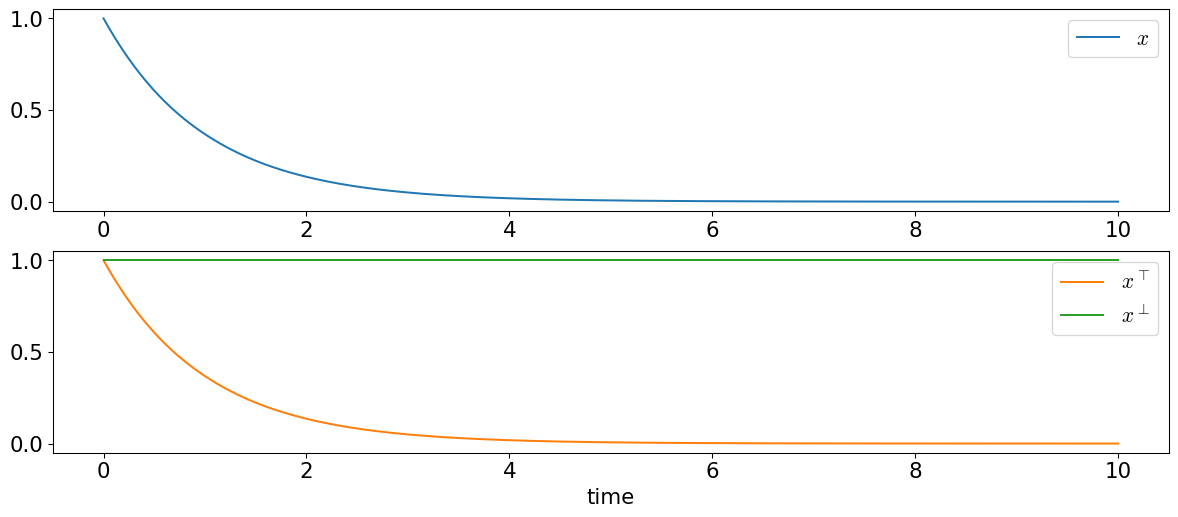

In [4]:
from math import pi
import numpy as np
import sympy as sp
import gpac as gp
from ode2tn import plot_tn, ode2tn

xt,xb = sp.symbols('x_t x_b')
x = sp.symbols('x')
odes = {
    x: -x,
}
inits = {
    x: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 10, 500)
tn_odes, tn_inits, tn_syms = ode2tn(odes, inits, gamma=gamma, beta=beta)
gp.display_odes(tn_odes)
print(f'{tn_inits=}')
print(f'{tn_syms=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma=gamma, beta=beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x], [xt,xb]])

## Bubble sort
These are ODEs that do a version of "bubble sort" in a sense. The variables $x_1,\dots,x_n$ are sorted. The variable $y_{i,i+1}$ is responsible for swapping $x_i$ and $x_{i+1}$ if they are out of order. See S. Paul and K. Huper, *Analog rank filtering*, in __IEEE Transactions on Circuits and Systems I: Fundamental Theory and Applications__, vol. 40, no. 7, pp. 469-476, July 1993, https://doi.org/10.1109/81.257302

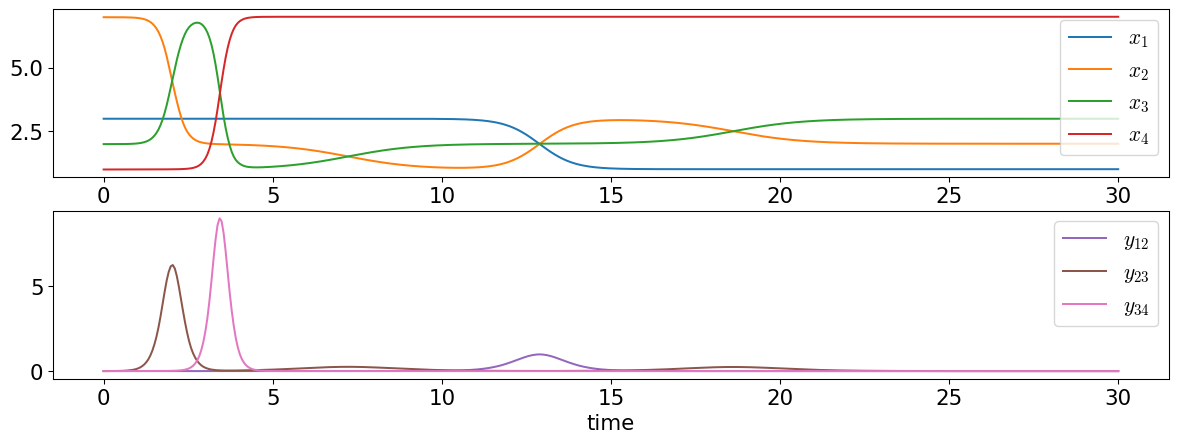

In [14]:
# bubble sort values x1, x2, x3, x4
x1,x2,x3,x4,y12,y23,y34 = sp.symbols('x_1 x_2 x_3 x_4 y_{12} y_{23} y_{34}')

odes = {
    x1: -y12,
    x2: -y23+y12,
    x3: -y34+y23,
    x4: y34,
    y12: (x1-x2)*y12,
    y23: (x2-x3)*y23,
    y34: (x3-x4)*y34,
}
eps = 0.001
inits = {
    x1: 3,
    x2: 7,
    x3: 2,
    x4: 1,
    y12: eps,
    y23: eps,
    y34: eps,
}
t_eval = np.linspace(0,30,500)
gamma = 1
beta = 1
figsize = (15,5)
plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta, figure_size=figsize, symbols_to_plot = [[x1,x2,x3,x4], [y12,y23,y34]])
import matplotlib.pyplot as plt
plt.savefig("plots/bubble-sort-plot.pdf", format="pdf", bbox_inches="tight")

## Schlögl system

This is a chemical reaction network with a "memory" (a.k.a., hysteresis). There are two species $X$ and $Y$. $X$ is only a catalyst so its concentration does not change. If we influence $X$

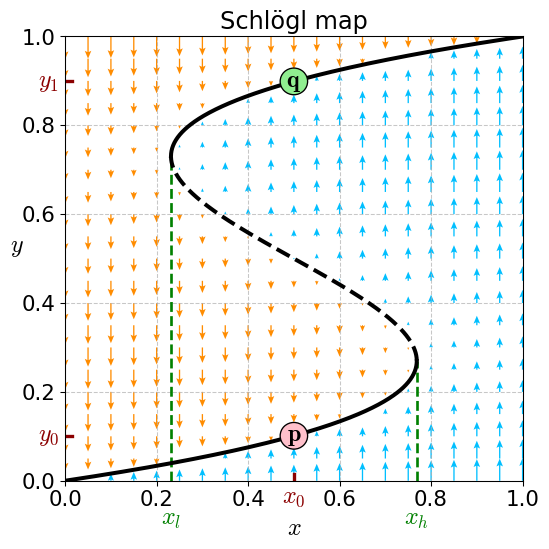

In [6]:
# First show plot of Schlogl map (inverse of function f, with "vector field")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker

# Define the function and its parameters
k1 = 11
k2 = 16.5
k3 = 6.5
def f(y):
    return k1*y**3 - k2*y**2 + k3*y

# Local optima
loc_max = 0.2697
loc_min = 0.7303

# Points for p and q circles
y_p = 0.10115
y_q = 0.89887
x_p = f(y_p)
x_q = f(y_q)

# Create data for plotting
y_vals = np.linspace(0, 1, 1000)
x_vals = f(y_vals)

# Create figure and axis
plt.figure(figsize=(6,6))
# fig, ax = plt.subplots(figsize=(10, 6))
ax = plt.gca()

# Add vertical lines at local optima
x_loc_max = f(loc_max)
x_loc_min = f(loc_min)
plt.vlines(x_loc_max, 0, loc_max, colors='g', linestyles='dashed', linewidth=2)
plt.vlines(x_loc_min, 0, loc_min, colors='g', linestyles='dashed', linewidth=2)

tick_color = "darkred"

# Add labels for vertical lines below the x-axis
plt.text(x_loc_min, -0.1, r'$x_l$', color='green', fontsize=18, ha='center')
plt.text(x_loc_max, -0.1, r'$x_h$', color='green', fontsize=18, ha='center')
plt.text(0.5, -0.05, r'$x_0$', color=tick_color, fontsize=18, ha='center')

# Add y-axis labels
plt.text(-0.06, y_p, r'$y_0$', color=tick_color, fontsize=18, va='center')
plt.text(-0.06, y_q, r'$y_1$', color=tick_color, fontsize=18, va='center')

# Create a grid for the vector field
x_grid = np.linspace(0, 1, 21)
y_grid = np.linspace(0, 1, 21)
X, Y = np.meshgrid(x_grid, y_grid)

# Define vector field directions
U = np.zeros_like(X)
V = np.zeros_like(Y)
colors = np.zeros_like(X)
mask = np.ones_like(X, dtype=bool)  # Mask to hide arrows that are too close to the curve

# Threshold to avoid arrows crossing the curve
eps = 0.012

arrows_prop = True # true if arrow length is proportional to vector magnitude
# Determine which side of the curve each grid point is on
for i in range(len(x_grid)):
    for j in range(len(y_grid)):
        x_point = X[j, i]
        y_point = Y[j, i]
        magnitude = abs(x_point - f(y_point))**0.5
        
        # Check if point is too close to the curve
        if f(y_point) > x_point and f(y_point-eps) < x_point:
            # Too close to the curve - don't draw an arrow
            mask[j, i] = False
        elif f(y_point) <= x_point and f(y_point+eps) > x_point:
            # Too close to the curve - don't draw an arrow
            mask[j, i] = False
        elif f(y_point) > x_point:
            # Left side of the curve - red arrows pointing down
            U[j, i] = 0
            V[j, i] = -0.5 if not arrows_prop else -magnitude
            colors[j, i] = 0  # Red
        else:
            # Right side of the curve - blue arrows pointing up
            U[j, i] = 0
            V[j, i] = 0.5 if not arrows_prop else magnitude
            colors[j, i] = 1  # Blue

# Apply the mask to hide arrows near the curve
X_masked = np.ma.array(X, mask=~mask)
Y_masked = np.ma.array(Y, mask=~mask)
U_masked = np.ma.array(U, mask=~mask)
V_masked = np.ma.array(V, mask=~mask)
colors_masked = np.ma.array(colors, mask=~mask)

# vector field
plt.quiver(X_masked, Y_masked, U_masked, V_masked, colors_masked, 
           # scale=20, 
           cmap=ListedColormap(['darkorange', 'deepskyblue']), 
           # width=0.006,
           headwidth=5, headlength=6, headaxislength=5
          )

# plot curve last so it covers other elements

# Plot the function in three parts (solid-dashed-solid)
# First segment (y from 0 to loc_max)
y1 = y_vals[y_vals <= loc_max]
x1 = x_vals[y_vals <= loc_max]
plt.plot(x1, y1, 'k-', linewidth=3, label='Inverse function')

# Middle segment (y from loc_max to loc_min) - dashed
y2 = y_vals[(y_vals > loc_max) & (y_vals < loc_min)]
x2 = x_vals[(y_vals > loc_max) & (y_vals < loc_min)]
plt.plot(x2, y2, 'k--', linewidth=3)

# Last segment (y from loc_min to 1)
y3 = y_vals[y_vals >= loc_min]
x3 = x_vals[y_vals >= loc_min]
plt.plot(x3, y3, 'k-', linewidth=3)

# Add circles with p and q labels at specified points
circle_p = plt.Circle((x_p, y_p), radius=0.03, facecolor='pink', edgecolor='black', zorder=10)
circle_q = plt.Circle((x_q, y_q), radius=0.03, facecolor='lightgreen', edgecolor='black', zorder=10)
ax.add_patch(circle_p)
ax.add_patch(circle_q)

# Add p and q labels inside the circles
plt.text(x_p, y_p, r'$\mathbf{p}$', fontsize=18, weight='bold', ha='center', va='center', zorder=11)
plt.text(x_q, y_q, r'$\mathbf{q}$', fontsize=18, weight='bold', ha='center', va='center', zorder=11)

# Add custom tick marks for x_0, y_0, and y_1
plt.plot([0.5, 0.5], [0.015, 0], color=tick_color, linewidth=2.5, transform=ax.get_xaxis_transform())
plt.plot([0.015, 0], [y_p, y_p], color=tick_color, linewidth=2.5, transform=ax.get_yaxis_transform())
plt.plot([0.015, 0], [y_q, y_q], color=tick_color, linewidth=2.5, transform=ax.get_yaxis_transform())

plt.xlabel(r'$x$', fontsize=18)
plt.ylabel(r'$y$', fontsize=18, rotation='horizontal')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(r'Schlögl map', fontsize=18)
plt.tight_layout()
plt.savefig('plots/schlogl-map.pdf', format='pdf', bbox_inches='tight')
plt.show()

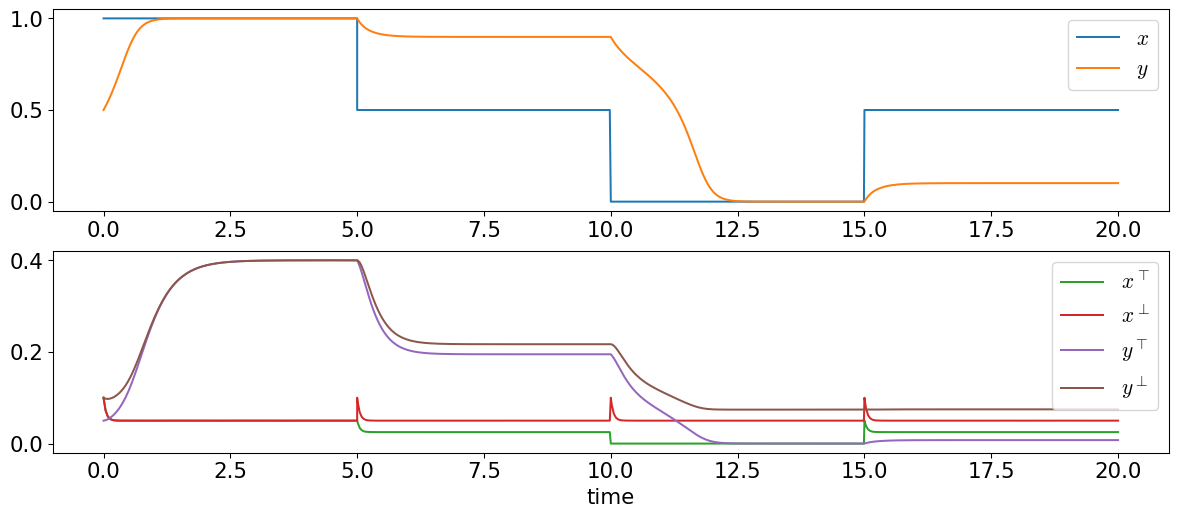

In [7]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import plot_tn, ode2tn

x_sp, y_sp = gp.species('x y')
k1 = 11
k2 = 16.5
k3 = 6.5
rxns = [
    x_sp >> x_sp+y_sp,
    (3*y_sp | 2*y_sp).k(k1).r(k2),
    (y_sp >> gp.empty).k(k3),
]
odes = gp.crn_to_odes(rxns)
# extract symbols from odes
for var in odes.keys():
    if var.name == 'x':
        x = var
    if var.name == 'y':
        y = var
inits = {
    x: 1,
    y: 0.5,
}
gamma = 20
beta = 1
scale = 0.1
t_eval = np.linspace(0, 20, 500)

tn_odes, tn_inits, _ = ode2tn(odes, inits, gamma=gamma, beta=beta, scale=scale)
for ratio_symbol in tn_inits.keys():
    if ratio_symbol.name == 'x_t':
        xt = ratio_symbol
    if ratio_symbol.name == 'x_b':
        xb = ratio_symbol
    if ratio_symbol.name == 'y_t':
        yt = ratio_symbol
    if ratio_symbol.name == 'y_b':
        yb = ratio_symbol

figsize = (15, 6)

# The `resets` parameter allows one to step in at pre-defined times and alter the value of variables.
# Below, we set x to 0.5 at time 5, to 0.01 at time 10, and to 0.5 at time 15.
# Variables can be original (x) or new (x_t, x_b). If new, the value is simply set.
# If an original variable set to value `val`, it is set the same way initial values are calculated:
# `x_t` is set to `scale*val`, and `x_b` is set to `scale`.
# This is used to show the "memory": 
# x starts "large" (1).
# The first time we set x to 0.5, y stays large (around 0.9).
# We then set x very low, which changes y to about 0.
# When we set x back to 0.5, and the system remembers that we previously made x low, 
# keeping y low (around 0.1), unlike the first time we set x to 0.5.
resets = { 
    5:  {x: 0.5},
    10: {x: 0.0},
    15: {x: 0.5},
}
scale = 0.1
plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta, scale=scale,
        resets=resets, figure_size=figsize,
        symbols_to_plot=[[x,y], [xt,xb,yt,yb]])
import matplotlib.pyplot as plt
plt.savefig("plots/schlogl-plot.pdf", format="pdf", bbox_inches="tight")

## Rössler attractor
This is a famous example of a chaotic system, where slight differences in initial conditions make for large differences in trajectories.

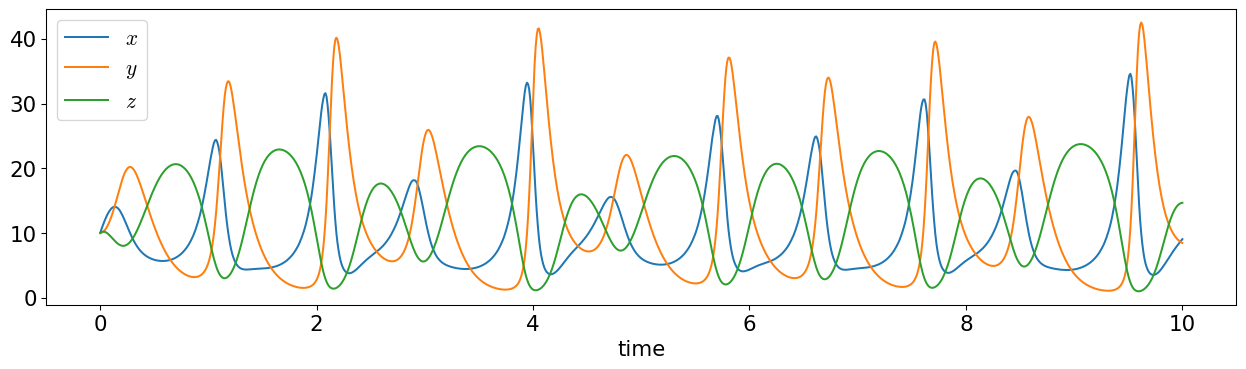

In [8]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import plot_tn, ode2tn

# parameters and ODEs taken from https://www.dna.caltech.edu/Papers/DNA_for_CRNs_2010_PNAS_SI.pdf
x,y,z = gp.species('x y z')
k1 = 30
k2 = 0.5
k3 = 1
k4 = 10
k5 = 1
k6 = 16.5
k7 = 0.5
rxns = [
    (x | 2*x).k(k1).r(k2),
    (x+y >> 2*y).k(k3),
    (y >> gp.empty).k(k4),
    (x+z >> gp.empty).k(k5),
    (z | 2*z).k(k6).r(k7),
]
odes = gp.crn_to_odes(rxns)
inits = {
    x: 10,
    y: 10,
    z: 10,
}
t_eval = np.linspace(0,10,1000)
gamma = 1
beta = 1
figsize = (16,4)

plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta, figure_size=figsize)
import matplotlib.pyplot as plt
plt.savefig("plots/rossler-plot.pdf", format="pdf", bbox_inches="tight")

## PID controller

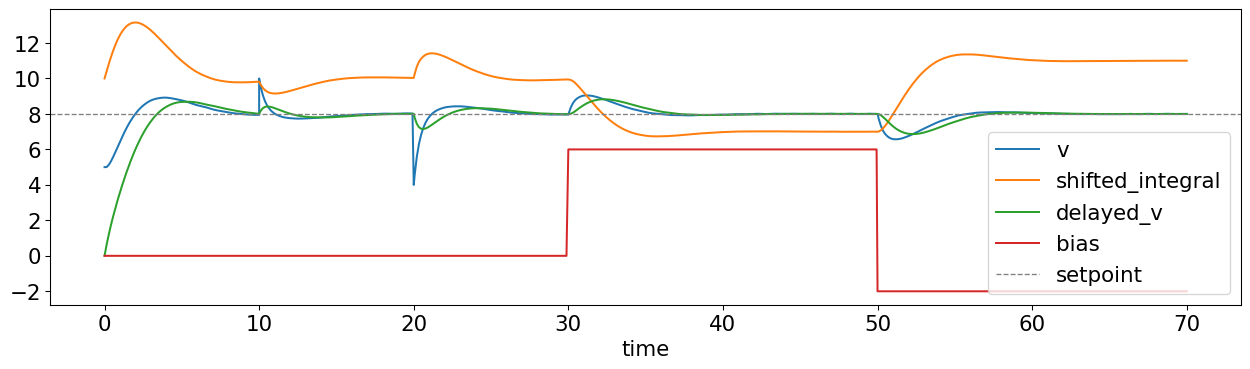

In [9]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import plot_tn, ode2tn, update_resets_with_ratios

P = 1.5
I = 1
D = -1
v, bias, shifted_integral, derivative_p, derivative_m, delayed_v = \
    sp.symbols('v bias shifted_integral derivative_p derivative_m delayed_v')
shift = 10
lmbda = 1     # delayed_val follows val; how far behind determined by lambda
setpoint = 8  # the value at which we want to hold the variable val
proportional_term = P * (setpoint - v)
integral_term = I * (shifted_integral - shift)  # we shift integral up to stop it from going negative
derivative_term = D * (v - delayed_v)
odes = {
    v: proportional_term + integral_term + derivative_term,
    shifted_integral: setpoint - v,     # integral is computed exactly and is one of the variables (though shifted up)
    delayed_v: lmbda * (v - delayed_v), # derivative is approximated and is implicitly val - delayed_val
}
inits = { 
    v: 5,
    shifted_integral: shift, 
}
t_eval = np.linspace(0,70,500)
figsize=(16,4)
resets = {
    10: {v: 10},
    20: {v: 4},
    30: {bias: 6},
    50: {bias: -2},
}
gamma = 3
beta = 1
# need to modify the TN, so instead of plot_tn, we call ode2tn to get the TN ODEs, modify them, then call gpac.plot on those
tn_odes, tn_inits, tn_syms = ode2tn(odes, inits, gamma=gamma, beta=beta)
v_top = tn_syms[v][0]
tn_odes[v_top] += bias # add bias term directly to the TN ODEs to model disturbance in the real system, not the simulated one
tn_odes[bias] = 0
# next function replaces any original variables in resets, such as v, with their TN equivalents v_top and v_bot
resets = update_resets_with_ratios(odes, resets, tn_odes, tn_syms)
dependent_symbols = {sym: sym_t/sym_b for sym, (sym_t, sym_b) in tn_syms.items()}
import matplotlib
gp.plot(tn_odes, tn_inits, t_eval, dependent_symbols=dependent_symbols, resets=resets, figure_size=figsize,
       symbols_to_plot=list(dependent_symbols.keys()) + [bias], loc='lower left')
import matplotlib.pyplot as plt
plt.yticks(range(-2,13,2))
plt.axhline(y=setpoint, color='gray', linestyle='--', linewidth=1, label="setpoint")
plt.legend(loc="lower right")
plt.savefig("plots/pid-plot.pdf", format="pdf", bbox_inches="tight")

## Extremum seeking
Taken from this paper: 
Miroslav Krstić, Hsin-Hsiung Wang,
*Stability of extremum seeking feedback for general nonlinear dynamic systems*,
**Automatica**,
Volume 36, Issue 4,
2000,
Pages 595-601,
https://doi.org/10.1016/S0005-1098(99)00183-1

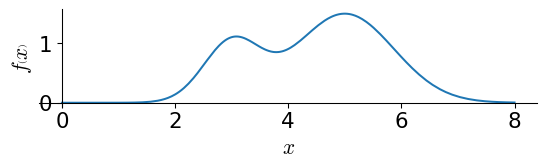

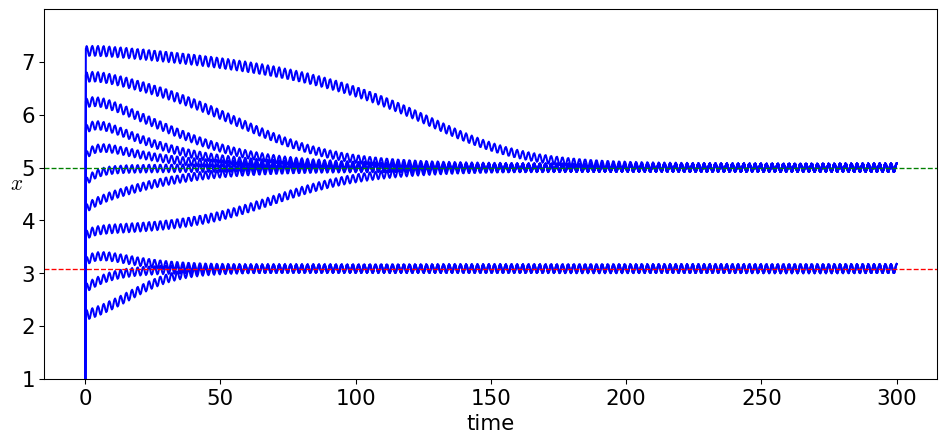

In [13]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import ode2tn
import matplotlib.pyplot as plt

gamma = 20
beta = 1
shift = 2 # amount by which to shift oscillator up to maintain positivity
x,p,q,w,z,zap = sp.symbols('x p q w z zap')
# objective function f as a sympy expression
f_exp = sp.exp(-(x-3)**2 / 0.5) + 1.5*sp.exp(-(x-5)**2 / 1.5)
f_plot = sp.plot(f_exp, (x, 0, 8), size=(6,2))
# next line commented out because it generates a new plot for some reason; uncomment to save the plot to a file
# f_plot.save("extremum-seek-objective-function.pdf") 

# f as a Python function that can be called with sympy Expression inputs to substitute for the variable x
def f(expr):
    return f_exp.subs(x, expr)
omega = 3            # frequency of oscillation
lmbda = 0.1 * omega
k = 0.5 * lmbda      # rate of convergence
a = 0.1              # magnitude of oscillation
odes = {
    p: omega*(q-shift),
    q: -omega*(p-shift),
    w: -lmbda*(w-shift), # + f(x)*(p-shift), # we add this after doing the construction
    z: k*(w-shift),
}
inits = {
    p: 0+shift,
    q: 1+shift,
    w: 0+shift,
    z: 2, # z(0) sets initial point of search
}
t_eval = np.linspace(0, 300, 1000)

# we manually plot instead of calling gpac.plot in order to show values of x for different initial values of z in one plot

tn_odes, tn_inits, tn_syms = ode2tn(odes, inits, gamma=gamma, beta=beta)
wt,wb = tn_syms[w]
pt,pb = tn_syms[p]
zt,zb = tn_syms[z]
tn_odes[wt] += f(x)*(pt/pb - shift)*wb
tn_odes[x] = gamma*(zt/zb + a*pt/pb - x)

x_idx = 0
found = False
for var in tn_odes.keys():
    if var == x:
        found = True
        break
    x_idx += 1
assert found

plt.figure(figsize=(12,5))

for z_init in np.arange(2, 7.5, 0.5):
    tn_inits[zt] = z_init
    tn_inits[zb] = 1
    sol = gp.integrate_odes(tn_odes, tn_inits, t_eval)
    x_vals = sol.y[x_idx]
    label = f"x for z(0)={z_init}"
    times = sol.t
    plt.plot(times, x_vals, label=label, color="blue")

plt.yticks(range(8))
plt.ylim(1,8)
plt.xlabel("time")
plt.ylabel(r"$x$", rotation='horizontal')
plt.axhline(y=5, color='g', linestyle='--', linewidth=1)
plt.axhline(y=3.084, color='r', linestyle='--', linewidth=1)
plt.savefig("plots/extremum-seek-local-max-plot.pdf", format="pdf", bbox_inches="tight")

## Diverging CRN
This shows an implementation of a CRN $2X \to 3X$ that, starting with $X=1$, diverges to $\infty$ as $t \to 1$.

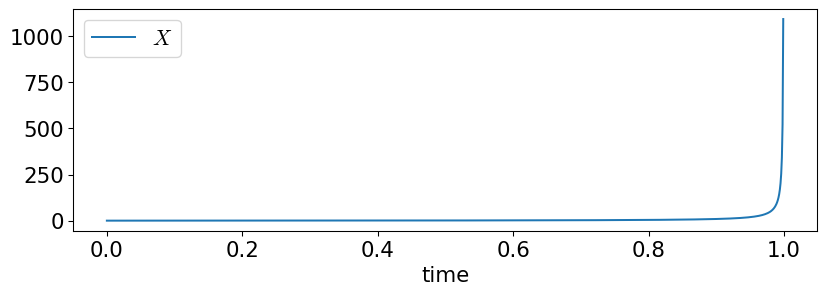

In [11]:
import gpac as gp
import numpy as np
import sympy as sp
from ode2tn import plot_tn

x = gp.species('X')
rxns = [2*x >> 3*x]
odes = gp.crn_to_odes(rxns)
inits = {x: 1}
t_eval = np.linspace(0,1,1000)
gamma = 1
beta = 1

plot_tn(odes, inits, t_eval, gamma=gamma, beta=beta)